In [87]:
import pandas as pd
import numpy as np
import string


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import linkage, fcluster

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/kaggle/input/myntra-reviews-on-women-dresses-comprehensive/Women Dresses Reviews Dataset .csv


In [88]:
df = pd.read_csv("/kaggle/input/myntra-reviews-on-women-dresses-comprehensive/Women Dresses Reviews Dataset .csv")
df.head()

,s.no,age,division_name,department_name,class_name,clothing_id,title,review_text,alike_feedback_count,rating,recommend_index
0,0,40,General,Bottoms,Jeans,1028,Amazing fit and wash,Like other reviewers i was hesitant to spend t...,0,5,1
1,1,62,General Petite,Tops,Blouses,850,Lovely and unique!,As is true of a bunch of the fall clothing pho...,12,5,1
2,2,47,General Petite,Bottoms,Skirts,993,Meh,"I so wanted this skirt to work, love the desig...",3,1,0
3,3,45,General Petite,Bottoms,Pants,1068,Wow,Love love this! i was hesitant to buy this at ...,0,5,1
4,4,37,Initmates,Intimate,Swim,24,Great for bigger busts,I absolutely love the retro look of this swims...,0,5,1


In [89]:
df=df[["alike_feedback_count","rating"]][:1000]
df.head()

,alike_feedback_count,rating
0,0,5
1,12,5
2,3,1
3,0,5
4,0,5


In [90]:
df = df.dropna()
df

,alike_feedback_count,rating
0,0,5
1,12,5
2,3,1
3,0,5
4,0,5
...,...,...
995,0,5
996,1,2
997,2,1
998,3,3


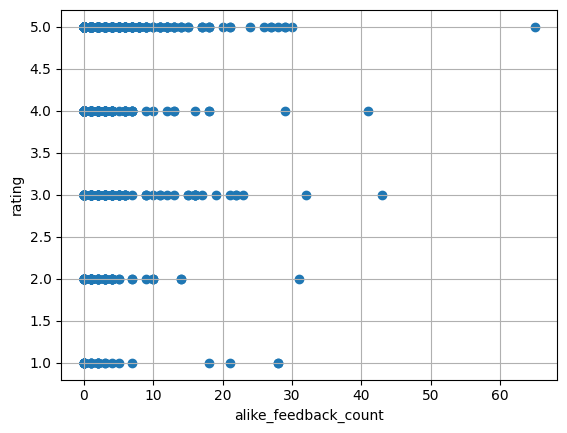

In [91]:
plt.scatter(df["alike_feedback_count"],df["rating"])
plt.xlabel("alike_feedback_count")
plt.ylabel("rating")
plt.grid(True)
plt.show()

# ***Implementing Partitioning Clustering***

In [92]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[["alike_feedback_count", "rating"]])

In [93]:
from sklearn.cluster import KMeans
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_scaled)

df['cluster_pred'] = kmeans.labels_

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [94]:
centroids = kmeans.cluster_centers_

centroids_original = scaler.inverse_transform(centroids)
centroid_ratings = centroids_original[:, 1]
df['predicted_rating'] = df['cluster_pred'].map(dict(zip(range(num_clusters), centroid_ratings)))

In [107]:
Partitioning_output = df[['alike_feedback_count', 'rating', 'predicted_rating', 'cluster_pred']].head()
Partitioning_output.head()

,alike_feedback_count,rating,predicted_rating,cluster_pred
0,0,5,5.000000,1
1,12,5,4.029412,0
2,3,1,3.161692,2
3,0,5,5.000000,1
4,0,5,5.000000,1


In [96]:
mse = mean_squared_error(df['rating'], df['predicted_rating'])
r2 = r2_score(df['rating'], df['predicted_rating'])

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.35044566028650537
R-squared: 0.7226951561167619


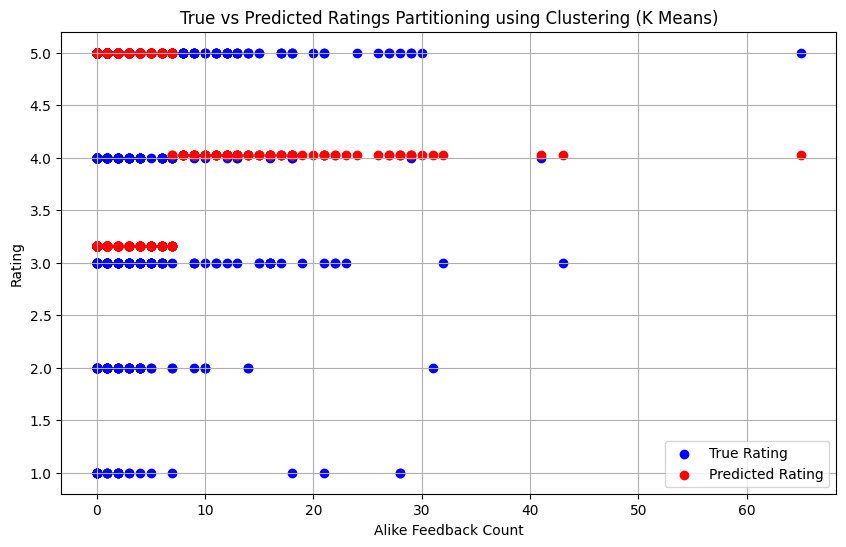

In [108]:
plt.figure(figsize=(10, 6))
plt.scatter(df['alike_feedback_count'], df['rating'], color='blue', label='True Rating')
plt.scatter(df['alike_feedback_count'], df['predicted_rating'], color='red', label='Predicted Rating')
plt.xlabel('Alike Feedback Count')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.title('True vs Predicted Ratings Partitioning using Clustering (K Means)')
plt.show()

# ***Implementing Hierarchical Clustering***

In [98]:
Z = linkage(df_scaled, method='ward')
num_clusters = 3 

cluster_labels = fcluster(Z, num_clusters, criterion='maxclust')
df['cluster_pred'] = cluster_labels - 1

In [99]:
centroids = np.array([df_scaled[cluster_labels == i].mean(axis=0) for i in range(1, num_clusters + 1)])
centroids_original = scaler.inverse_transform(centroids)

centroid_ratings = centroids_original[:, 1]
df['predicted_rating'] = df['cluster_pred'].map(dict(zip(range(num_clusters), centroid_ratings)))

In [106]:
Hierarchical_output = df[['alike_feedback_count', 'rating', 'predicted_rating', 'cluster_pred']].head()
Hierarchical_output.head()

,alike_feedback_count,rating,predicted_rating,cluster_pred
0,0,5,5.000000,1
1,12,5,4.029412,0
2,3,1,3.161692,2
3,0,5,5.000000,1
4,0,5,5.000000,1


In [101]:
mse = mean_squared_error(df['rating'], df['predicted_rating'])
r2 = r2_score(df['rating'], df['predicted_rating'])

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5114018144571262
R-squared: 0.59533184059492


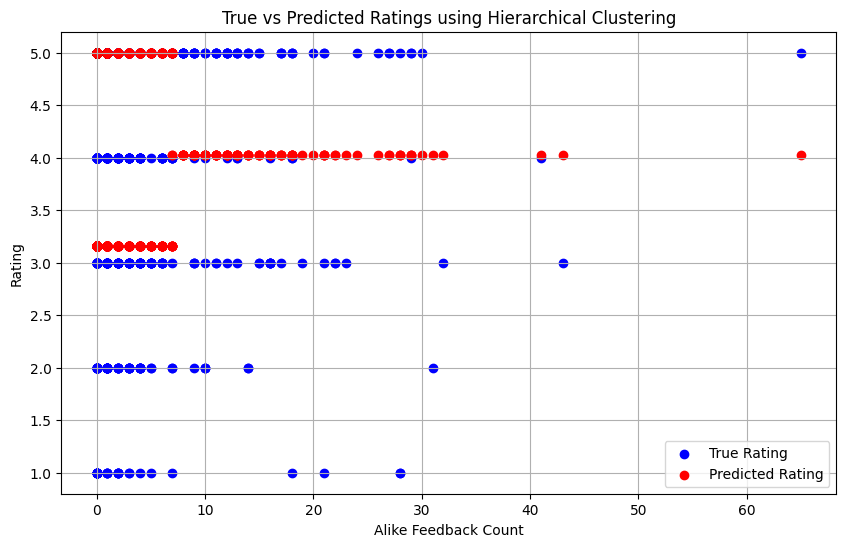

In [102]:
plt.figure(figsize=(10, 6))
plt.scatter(df['alike_feedback_count'], df['rating'], color='blue', label='True Rating')
plt.scatter(df['alike_feedback_count'], df['predicted_rating'], color='red', label='Predicted Rating')
plt.xlabel('Alike Feedback Count')
plt.ylabel('Rating')
plt.legend()
plt.grid(True)
plt.title('True vs Predicted Ratings using Hierarchical Clustering')
plt.show()